---
# 💼 Attrition in an Organization || Why Workers Quit?

---

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

> 1. Expensive in terms of both money and time to train new employees.
> 1. Loss of experienced employees
> 1. Impact in productivity
> 1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

------
## 📌 Business questions to brainstorm:
---
> 1. What factors are contributing more to employee attrition?
> 1. What type of measures should the company take in order to retain their employees?
> 1. What business value does the model bring?
> 1. Will the model save lots of money?
> 1. Which business unit faces the attrition problem?

In [1]:
!pip install -q hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.6/180.6 kB 13.9 MB/s eta 0:00:00


In [2]:
import hvplot

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [6]:
df = pd.read_csv("/content/HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


---
# 📊 Exploratory Data Analysis

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        > - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        > - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        > - Continous & Continous : Scatter plots to know how continous variables interact with each other
        > - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        > - categorical variables
        > - Categorical & Continous : Boxplots, Swamplots or even bar charts
- Detect outliers
- Feature engineering

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [9]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [34]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

KeyError: "['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'] not found in axis"

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


---
## 📉 Categorical Features

In [13]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender : ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representativ

In [14]:
len(object_col)

7

In [15]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

---
## 📉 Numerical Features

In [16]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [17]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


---
## 📉 Data Visualisation

In [18]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [19]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [20]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [21]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [22]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [23]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [24]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

In [25]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [26]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [27]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [28]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)

## 📌 Note

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

In [29]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

In [30]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [31]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [32]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

***

## 📝 **Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

***

---
# 📉 Correlation Matrix

<AxesSubplot:>

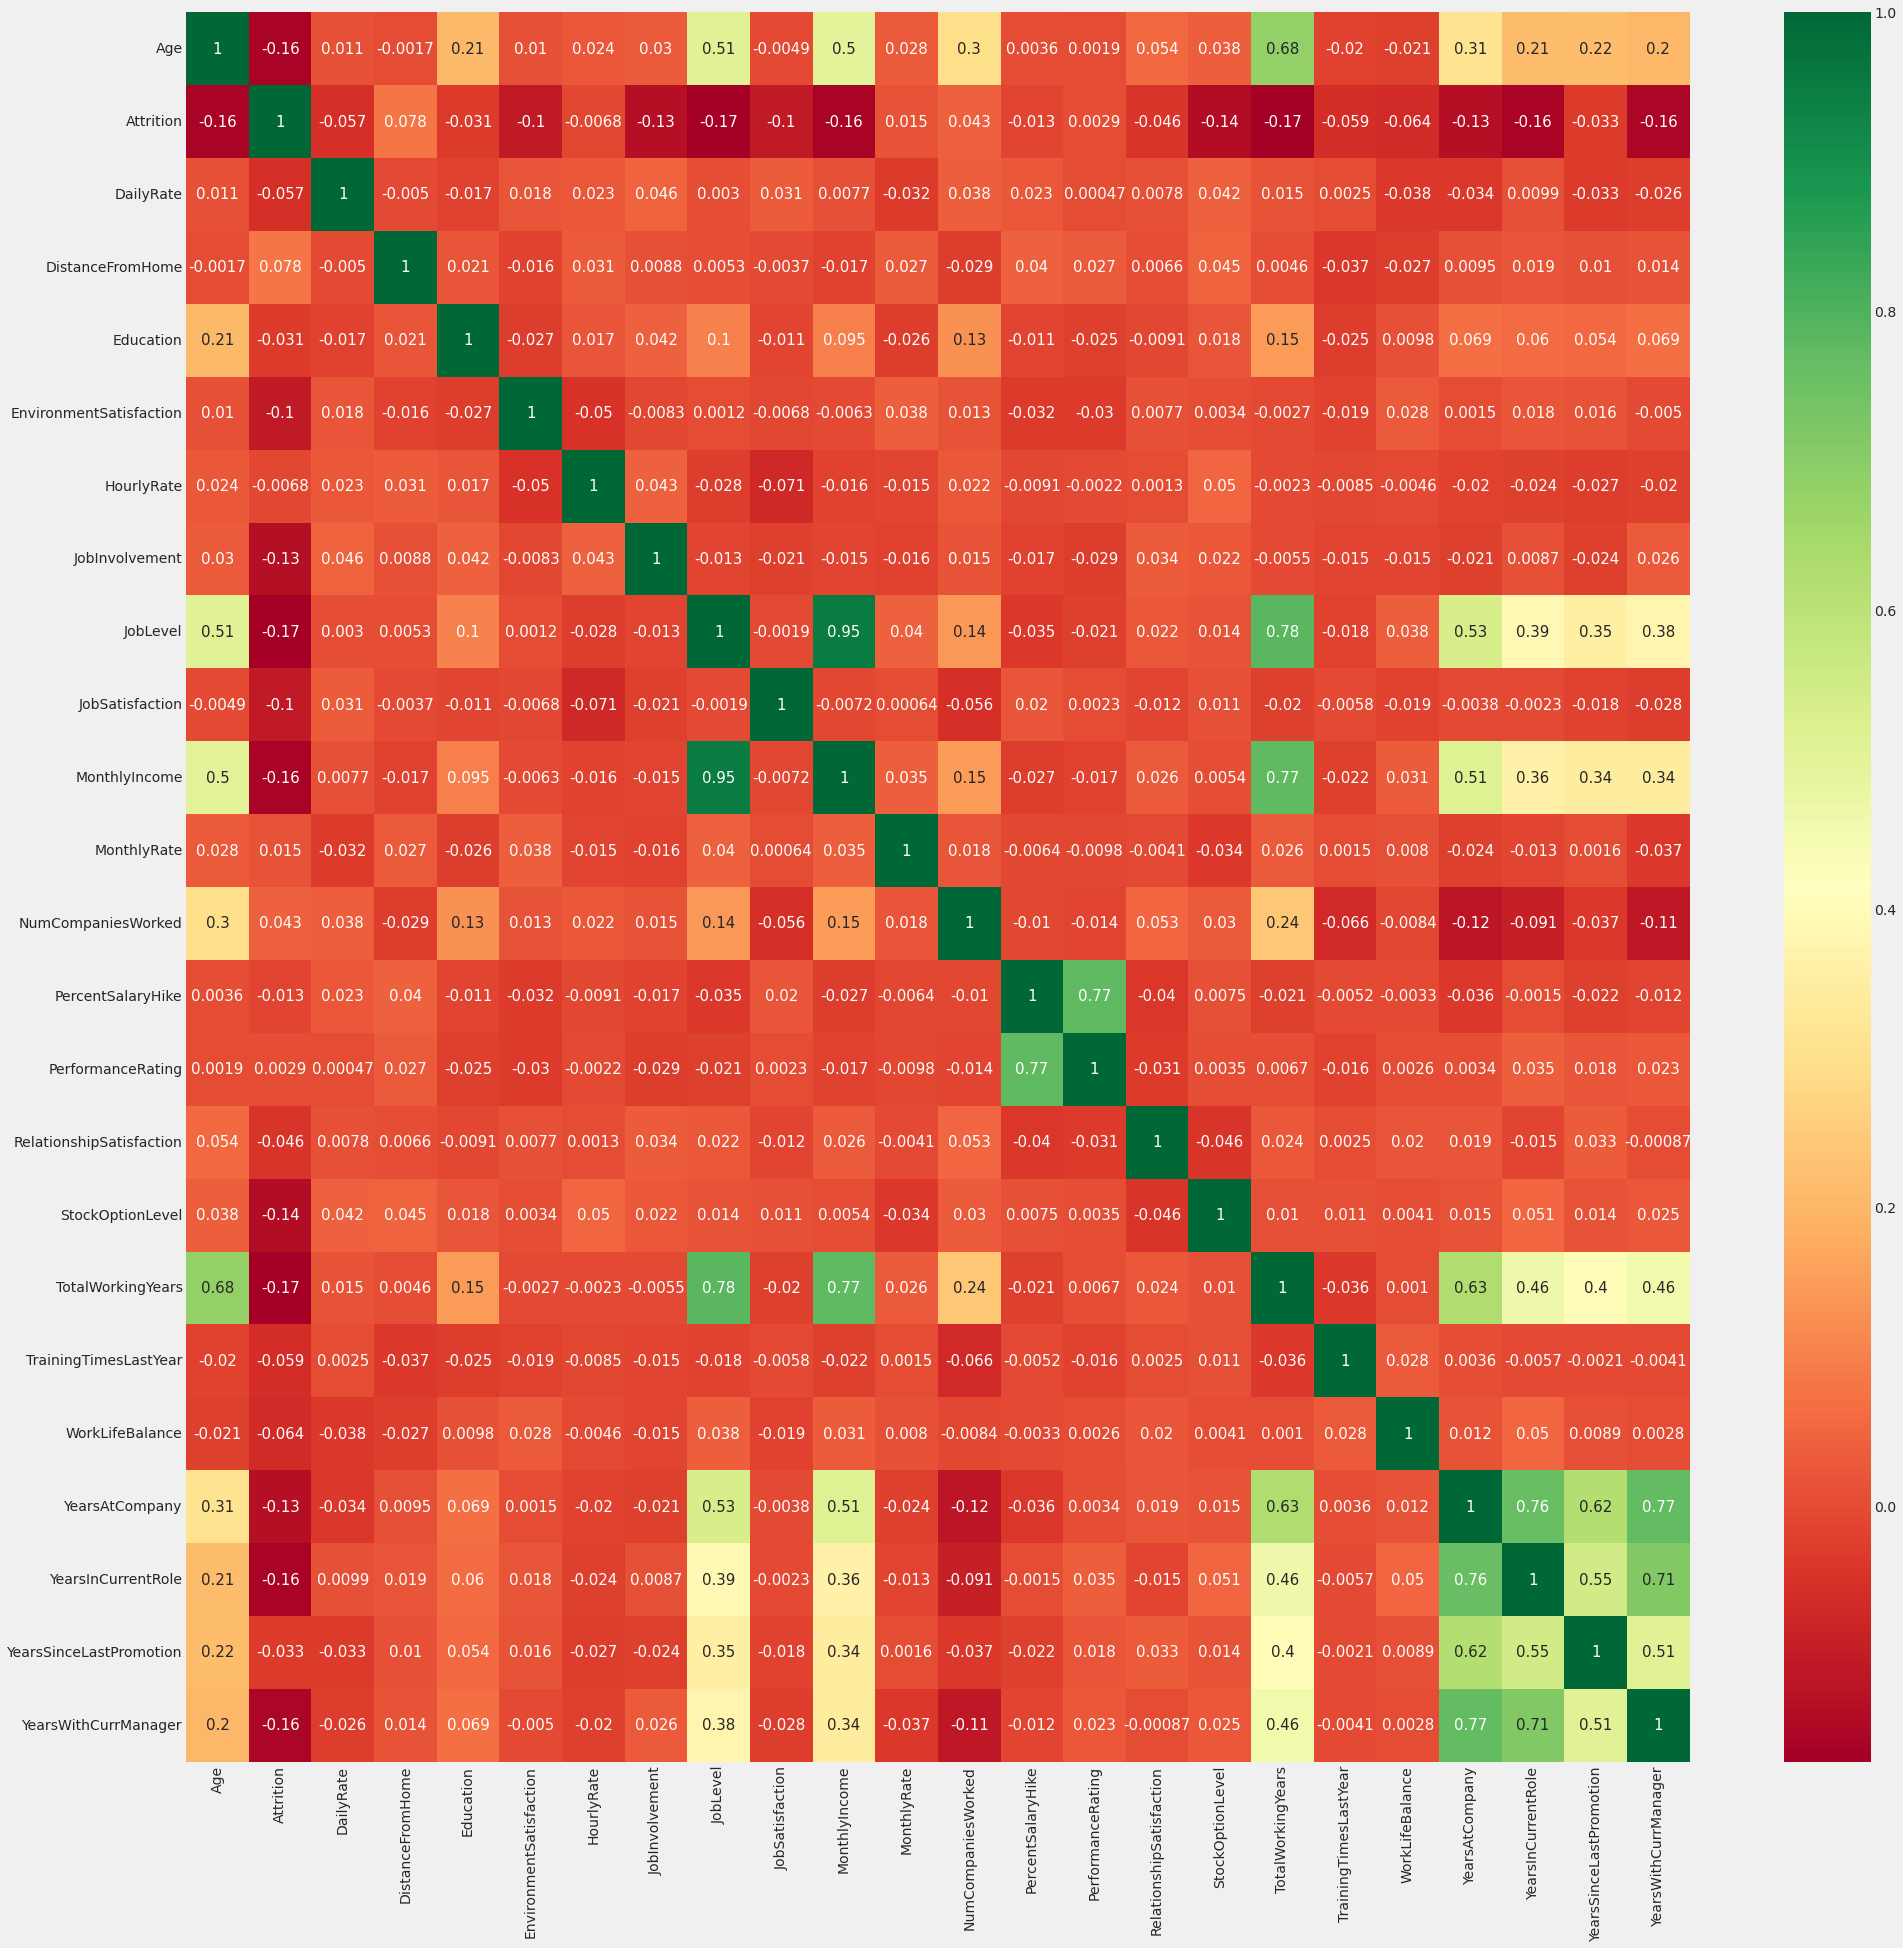

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<AxesSubplot:>

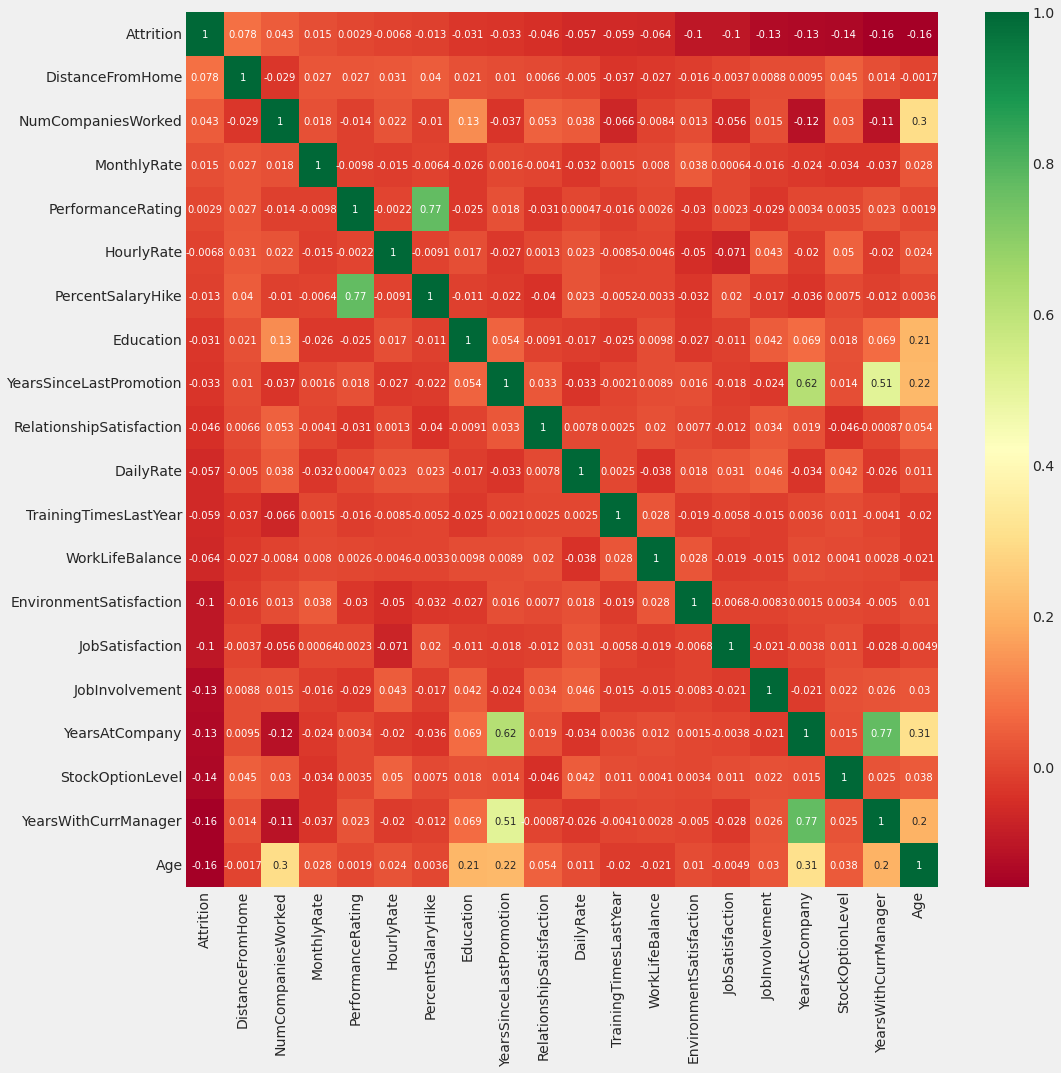

In [ ]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [ ]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).hvplot.barh()

:Bars   [index]   (0)

## 📝 **Analysis of correlation results (sample analysis):**
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

---
# 🔨 Data Processing

In [36]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [37]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<Axes: >

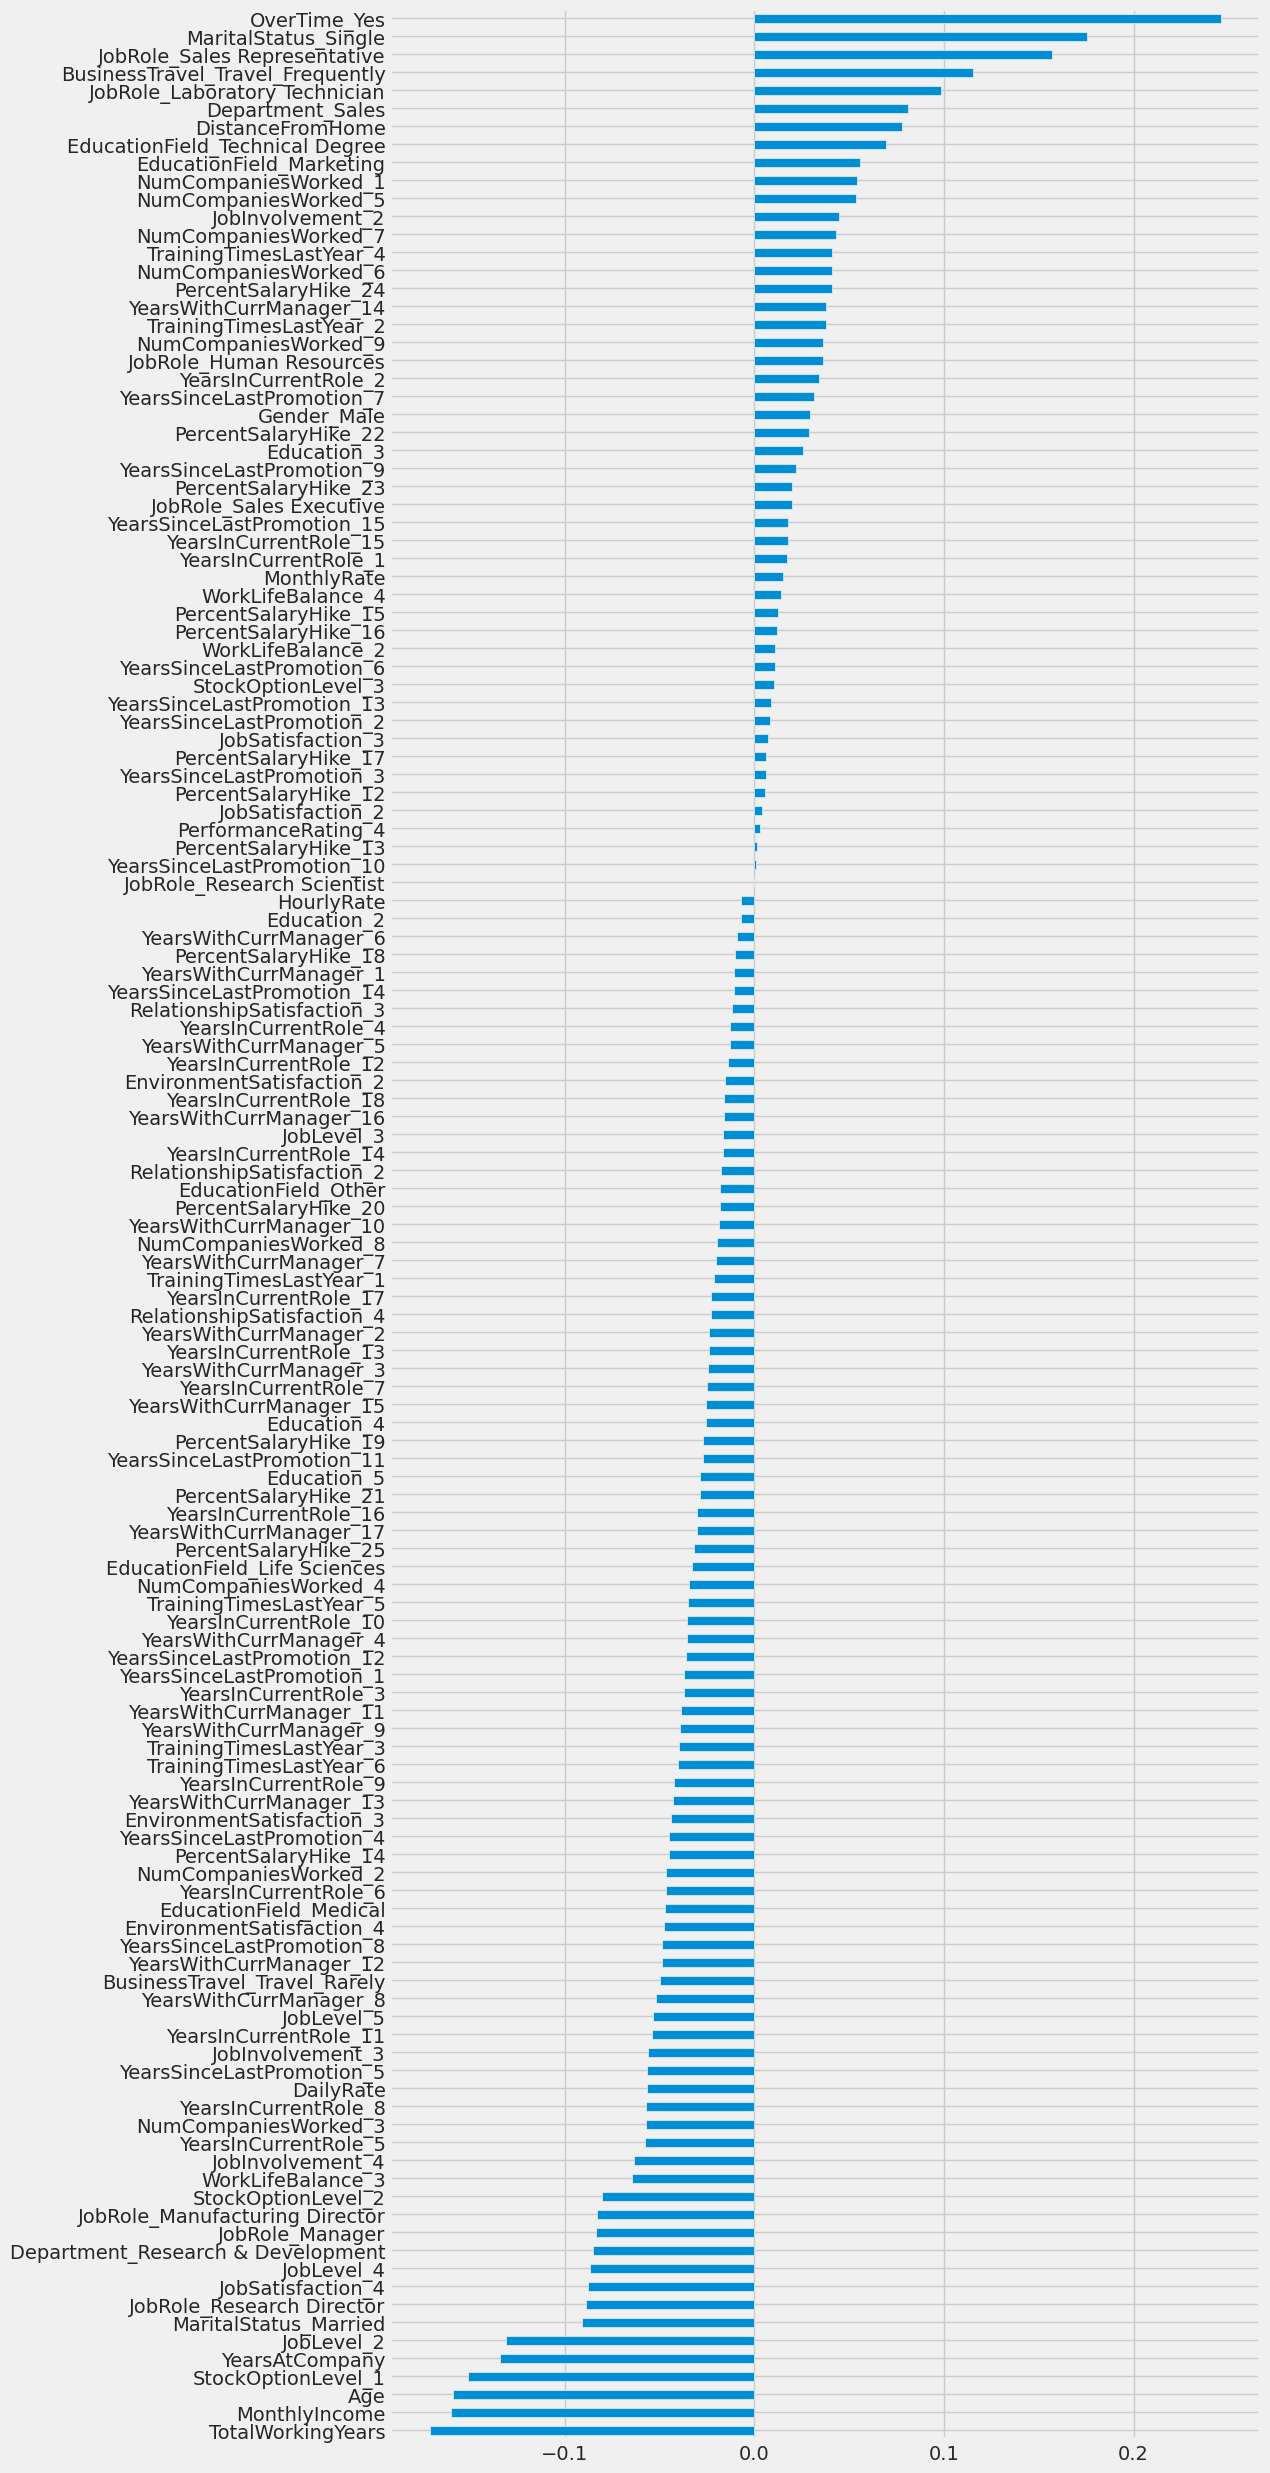

In [39]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [40]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

# 🤖 Applying machine learning algorithms

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [42]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

## 🎯 What defines success?
> We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of `83.90%`.


In [43]:
y_test.value_counts()[0] / y_test.shape[0]

np.float64(0.8390022675736961)

In [44]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## ✔️ Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[849  14]
 [ 59 107]]
ACCURACY SCORE:
0.9291
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.88      0.93       0.91          0.93
recall      0.98   0.64      0.93       0.81          0.93
f1-score    0.96   0.75      0.93       0.85          0.92
support   863.00 166.00      0.93    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[348  22]
 [ 43  28]]
ACCURACY SCORE:
0.8526
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.56      0.85       0.73          0.84
recall      0.94  0.39      0.85       0.67          0.85
f1-score    0.91  0.46      0.85       0.69          0.84
support   370.00 71.00      0.85     441.00        441.00


In [48]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## ✔️ Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[355  15]
 [ 63   8]]
ACCURACY SCORE:
0.8231
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.85  0.35      0.82       0.60          0.77
recall      0.96  0.11      0.82       0.54          0.82
f1-score    0.90  0.17      0.82       0.54          0.78
support   370.00 71.00      0.82     441.00        441.00


In [56]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

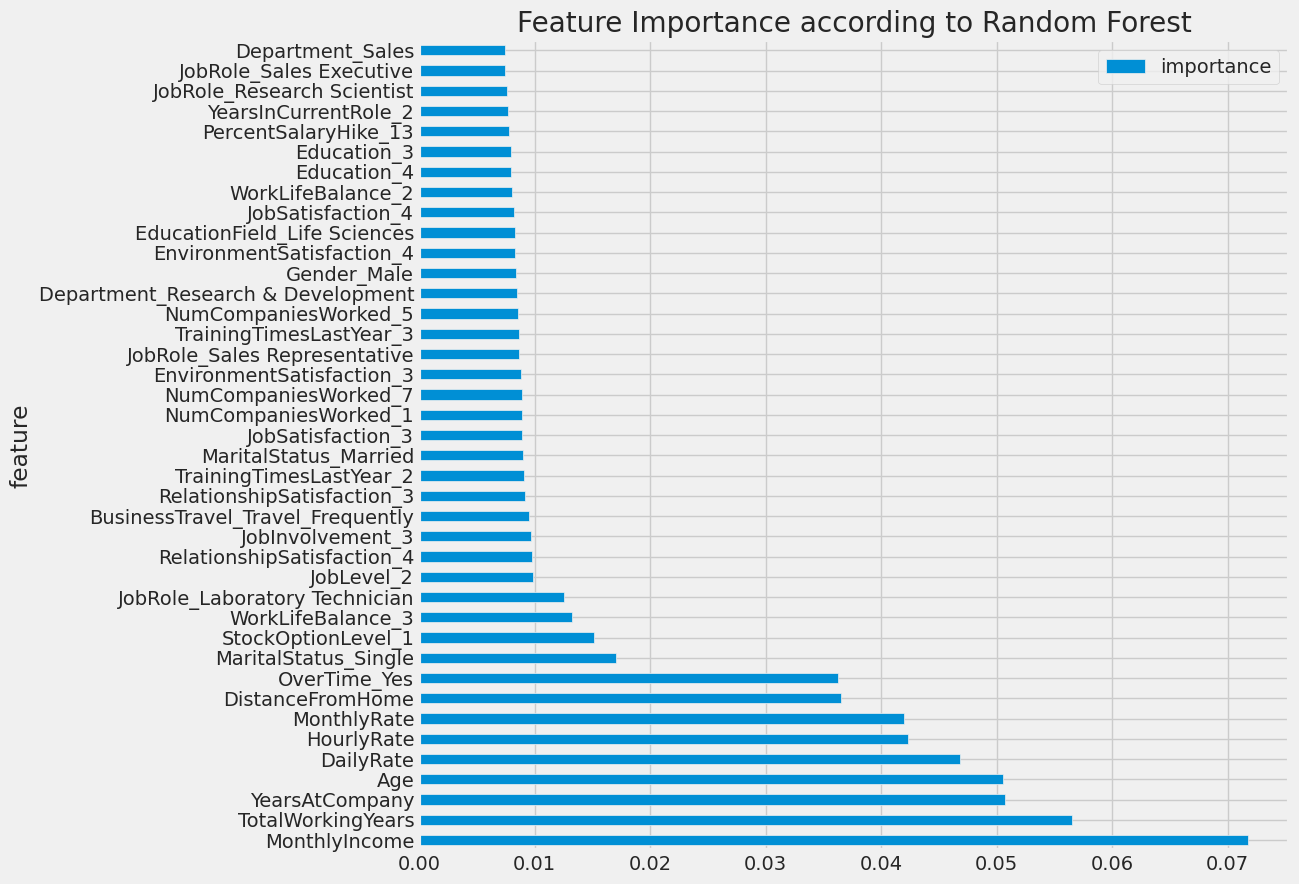

In [57]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

## ✔️ Support Vector Machine

In [58]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 47 119]]
ACCURACY SCORE:
0.9466
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.94      0.95       0.94          0.95
recall      0.99   0.72      0.95       0.85          0.95
f1-score    0.97   0.81      0.95       0.89          0.94
support   863.00 166.00      0.95    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[345  25]
 [ 44  27]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.52      0.84       0.70          0.83
recall      0.93  0.38      0.84       0.66          0.84
f1-score    0.91  0.44      0.84       0.67          0.83
support   370.00 71.00      0.84     441.00        441.00


In [59]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

## ✔️ XGBoost Classifier

In [60]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00      1.00    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[358  12]
 [ 48  23]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.88  0.66      0.86       0.77          0.85
recall      0.97  0.32      0.86       0.65          0.86
f1-score    0.92  0.43      0.86       0.68          0.84
support   370.00 71.00      0.86     441.00        441.00


In [61]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

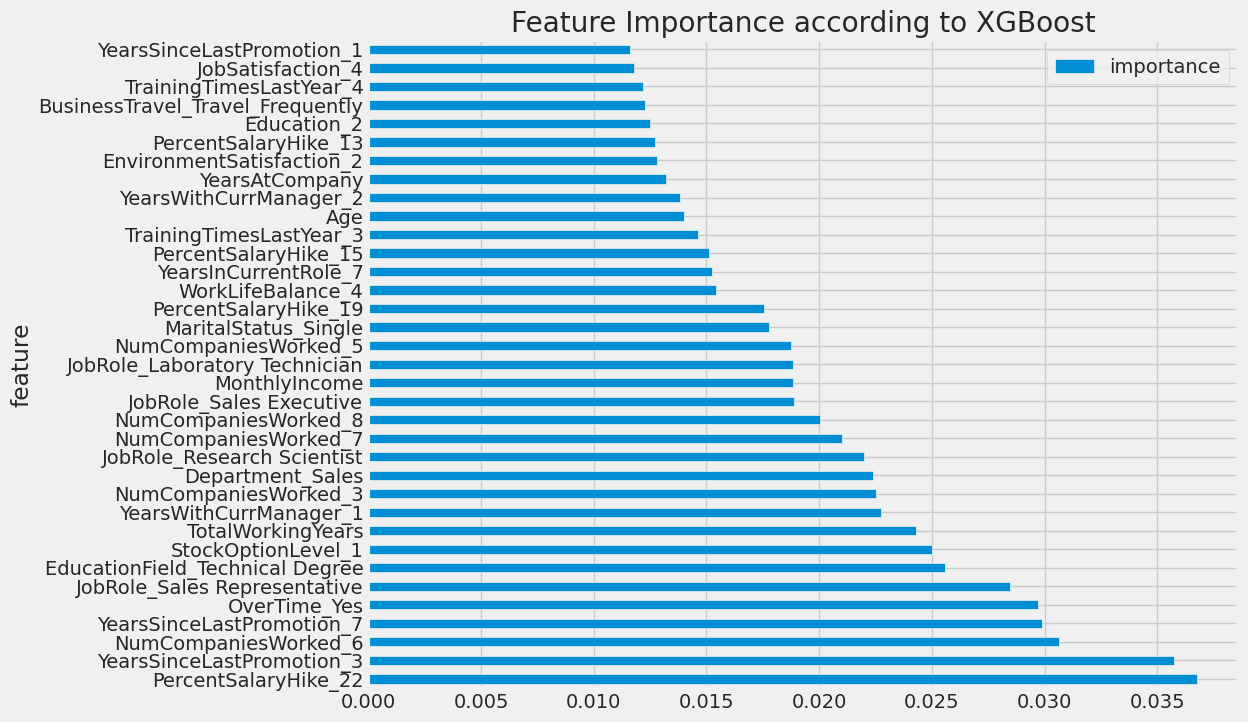

In [62]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

## ✔️ LightGBM

In [63]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

evaluate(lgb_clf, X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 108
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   863.00 166.00  

In [64]:
scores_dict['LightGBM'] = {
        'Train': roc_auc_score(y_train, lgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lgb_clf.predict(X_test)),
    }

## ✔️ CatBoost

In [66]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [67]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 16 150]]
ACCURACY SCORE:
0.9845
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.98       0.99          0.98
recall      1.00   0.90      0.98       0.95          0.98
f1-score    0.99   0.95      0.98       0.97          0.98
support   863.00 166.00      0.98    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 57  14]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.61      0.85       0.74          0.82
recall      0.98  0.20      0.85       0.59          0.85
f1-score    0.92  0.30      0.85       0.61          0.82
support   370.00 71.00      0.85     441.00        441.00


In [68]:
scores_dict['CatBoost'] = {
        'Train': roc_auc_score(y_train, cb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, cb_clf.predict(X_test)),
    }

## ✔️ AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [105  61]]
ACCURACY SCORE:
0.8902
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.88      0.89       0.89          0.89
recall      0.99   0.37      0.89       0.68          0.89
f1-score    0.94   0.52      0.89       0.73          0.87
support   863.00 166.00      0.89    1029.00       1029.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 56  15]]
ACCURACY SCORE:
0.8277
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.43      0.83       0.65          0.79
recall      0.95  0.21      0.83       0.58          0.83
f1-score    0.90  0.28      0.83       0.59          0.80
support   370.00 71.00      0.83     441.00        441.00


In [70]:
scores_dict['AdaBoost'] = {
        'Train': roc_auc_score(y_train, ab_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, ab_clf.predict(X_test)),
    }

# 🎯 Comparing Models Prerformance 📊

In [71]:
ml_models = {
    'Logistic Regression': lr_clf,
    'Random Forest': rf_clf,
    'Support Vector Machine': svm_clf,
    'XGBoost': xgb_clf,
    'LightGBM': lgb_clf,
    'CatBoost': cb_clf,
    'AdaBoost': ab_clf
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

LOGISTIC REGRESSION            roc_auc_score: 0.546
RANDOM FOREST                  roc_auc_score: 0.536
SUPPORT VECTOR MACHINE         roc_auc_score: 0.550
XGBOOST                        roc_auc_score: 0.646
LIGHTGBM                       roc_auc_score: 0.609
CATBOOST                       roc_auc_score: 0.586
ADABOOST                       roc_auc_score: 0.579


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [74]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)

In [76]:
import joblib

# Make predictions on the test set using the best model (XGBoost)
y_pred_xgb = xgb_clf.predict(X_test)

print("XGBoost Model Predictions on Test Set:")
print(y_pred_xgb[:100]) # Displaying first 10 predictions

print("\n--- Inference Example ---")
# Example of making a single prediction on new data
# For demonstration, we'll use the first row of X_test as 'new data'
sample_new_data = X_test.iloc[0].values.reshape(1, -1)
single_prediction = xgb_clf.predict(sample_new_data)
print(f"Prediction for a sample new data point: {single_prediction[0]}")


print("\n--- Saving and Loading the Model ---")
# Save the trained XGBoost model for future inference
model_filename = 'xgboost_attrition_model.pkl'
joblib.dump(xgb_clf, model_filename)
print(f"XGBoost model saved as {model_filename}")

# To load the model later for inference:
loaded_model = joblib.load(model_filename)
print(f"Model loaded: {loaded_model}")

# You can then use the loaded_model for predictions on new data
# For example:
loaded_model_prediction = loaded_model.predict(sample_new_data)
print(f"Prediction using loaded model: {loaded_model_prediction[0]}")

XGBoost Model Predictions on Test Set:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

--- Inference Example ---
Prediction for a sample new data point: 0

--- Saving and Loading the Model ---
XGBoost model saved as xgboost_attrition_model.pkl
Model loaded: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=Non

# Task
Develop a model to predict employee attrition based on the provided HR employee attrition dataset, and prepare a template for new employee data input, including detailed column explanations for inference.

## Identify Original Feature Columns

### Subtask:
Identify all feature columns from the original DataFrame (`df`) before one-hot encoding, excluding the 'Attrition' target variable.


:**Reasoning**:
Combine the lists of continuous, discrete, and categorical column names to form a complete list of original feature columns before one-hot encoding, and then print the count and a sample of these columns.



In [85]:
original_numerical_columns = cont_col + disc_col
print(f"cont cols = {cont_col}")
print(f"disc_col = {disc_col}")s
original_feature_columns = original_numerical_columns + object_col
print(f"object_col = {object_col}")
print(f"Number of original feature columns: {len(original_feature_columns)}")
print(original_feature_columns)


cont cols = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']
disc_col = ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
object_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Number of original feature columns: 30
['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsIn

## Create Empty CSV with Original Features

### Subtask:
Create an empty Pandas DataFrame using these original feature column names and save it to a CSV file named 'new_employee_data_original_features.csv'. This will serve as the simplified template for user input.


**Reasoning**:
To create an empty DataFrame with the original feature columns and save it as a CSV file, I will use pandas.DataFrame to initialize the DataFrame with the specified columns and then use the to_csv method to save it.



In [80]:
new_employee_template_df = pd.DataFrame(columns=original_feature_columns)
new_employee_template_df.to_csv('new_employee_data_original_features.csv', index=False)
print("Empty 'new_employee_data_original_features.csv' created with original feature columns.")
print(f"Columns in the new CSV: {new_employee_template_df.columns.tolist()[:5]}...")

Empty 'new_employee_data_original_features.csv' created with original feature columns.
Columns in the new CSV: ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']...


### Column Descriptions for `new_employee_data_original_features.csv`

This section details each feature column in the `new_employee_data_original_features.csv` template. Users should populate these columns with data for new employees to predict attrition.

**Numerical Features:**

*   **Age**: Employee's current age.
    *   **Data Type**: Integer
    *   **Range**: 18 to 60
*   **DailyRate**: Daily rate of pay for the employee.
    *   **Data Type**: Integer
    *   **Range**: 102 to 1499
*   **DistanceFromHome**: Distance from home to work in miles.
    *   **Data Type**: Integer
    *   **Range**: 1 to 29
*   **HourlyRate**: Hourly rate of pay for the employee.
    *   **Data Type**: Integer
    *   **Range**: 30 to 100
*   **MonthlyIncome**: Monthly income of the employee.
    *   **Data Type**: Integer
    *   **Range**: 1009 to 19999
*   **MonthlyRate**: Monthly rate of pay for the employee.
    *   **Data Type**: Integer
    *   **Range**: 2094 to 26999
*   **TotalWorkingYears**: Total number of years the employee has worked.
    *   **Data Type**: Integer
    *   **Range**: 0 to 40
*   **YearsAtCompany**: Total number of years the employee has worked at the current company.
    *   **Data Type**: Integer
    *   **Range**: 0 to 40
*   **YearsInCurrentRole**: Number of years in current role.
    *   **Data Type**: Integer
    *   **Range**: 0 to 18
*   **YearsSinceLastPromotion**: Number of years since last promotion.
    *   **Data Type**: Integer
    *   **Range**: 0 to 15
*   **YearsWithCurrManager**: Number of years with current manager.
    *   **Data Type**: Integer
    *   **Range**: 0 to 17
*   **Education**: Level of education (1 'Below College' to 5 'Master').
    *   **Data Type**: Integer
    *   **Range**: 1 to 5
*   **EnvironmentSatisfaction**: Job environment satisfaction level (1 'Low' to 4 'Very High').
    *   **Data Type**: Integer
    *   **Range**: 1 to 4
*   **JobInvolvement**: Job involvement level (1 'Low' to 4 'Very High').
    *   **Data Type**: Integer
    *   **Range**: 1 to 4
*   **JobLevel**: Job level (1 'Entry Level' to 5 'Director/VP').
    *   **Data Type**: Integer
    *   **Range**: 1 to 5
*   **JobSatisfaction**: Job satisfaction level (1 'Low' to 4 'Very High').
    *   **Data Type**: Integer
    *   **Range**: 1 to 4
*   **NumCompaniesWorked**: Number of companies worked for.
    *   **Data Type**: Integer
    *   **Range**: 0 to 9
*   **PercentSalaryHike**: Percentage salary hike for the employee.
    *   **Data Type**: Integer
    *   **Range**: 11 to 25
*   **PerformanceRating**: Performance rating (3 'Excellent' to 4 'Outstanding').
    *   **Data Type**: Integer
    *   **Range**: 3 to 4
*   **RelationshipSatisfaction**: Relationship satisfaction level (1 'Low' to 4 'Very High').
    *   **Data Type**: Integer
    *   **Range**: 1 to 4
*   **StockOptionLevel**: Stock option level.
    *   **Data Type**: Integer
    *   **Range**: 0 to 3
*   **TrainingTimesLastYear**: Number of training times last year.
    *   **Data Type**: Integer
    *   **Range**: 0 to 6
*   **WorkLifeBalance**: Work-life balance level (1 'Bad' to 4 'Best').
    *   **Data Type**: Integer
    *   **Range**: 1 to 4

**Categorical Features:**

*   **BusinessTravel**: Frequency of business travel.
    *   **Data Type**: String
    *   **Acceptable Values**: 'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'
*   **Department**: Department the employee belongs to.
    *   **Data Type**: String
    *   **Acceptable Values**: 'Sales', 'Research & Development', 'Human Resources'
*   **EducationField**: Field of education.
    *   **Data Type**: String
    *   **Acceptable Values**: 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'
*   **Gender**: Employee's gender.
    *   **Data Type**: String
    *   **Acceptable Values**: 'Female', 'Male'
*   **JobRole**: Employee's job role.
    *   **Data Type**: String
    *   **Acceptable Values**: 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'
*   **MaritalStatus**: Employee's marital status.
    *   **Data Type**: String
    *   **Acceptable Values**: 'Single', 'Married', 'Divorced'
*   **OverTime**: Whether the employee works overtime.
    *   **Data Type**: String
    *   **Acceptable Values**: 'Yes', 'No'


## Explain New Data Preprocessing

### Subtask:
Provide a clear explanation of how the user-provided data from 'new_employee_data_original_features.csv' should be preprocessed (specifically, one-hot encoded) to match the format expected by the trained XGBoost model before inference. This will involve re-applying the `pd.get_dummies` function and aligning columns.


### Preprocessing New Data for Inference

When using the `new_employee_data_original_features.csv` template to predict attrition for new employees, it's crucial that the input data matches the format the trained XGBoost model expects. The model was trained on data that underwent specific transformations, most notably one-hot encoding of categorical features.

Here's a breakdown of the preprocessing steps required for new data:

1.  **Load the new employee data**: Read the `new_employee_data_original_features.csv` file into a Pandas DataFrame.

2.  **One-Hot Encode Categorical Columns**: The original training data had several categorical columns (e.g., `BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `OverTime`) that were converted into numerical format using one-hot encoding (e.g., `pd.get_dummies`). You must re-apply this same `pd.get_dummies` function to the new employee data. This will create new binary columns (e.g., `BusinessTravel_Travel_Frequently`, `Gender_Male`) for each category.

    *   **Original Categorical Columns (before one-hot encoding):**
        *   `BusinessTravel`
        *   `Department`
        *   `EducationField`
        *   `Gender`
        *   `JobRole`
        *   `MaritalStatus`
        *   `OverTime`

    *   **The `pd.get_dummies` function will expand these columns into multiple binary columns.**

3.  **Align Columns with Training Data**: This is a critical step. The XGBoost model expects the input features to be in the exact same order and with the exact same column names as the data it was trained on (`X` DataFrame). After one-hot encoding the new data:

    *   **Identify Missing Columns**: Compare the columns of your preprocessed new data with the columns of the `X` (training features) DataFrame. Any columns present in `X` but *missing* from your new data (e.g., a category not present in the new data but seen during training) must be added to your new data DataFrame and filled with `0`s.
    *   **Drop Extra Columns**: Conversely, any columns present in your new data that are *not* in the `X` (training features) DataFrame should be dropped. This ensures no unexpected features are passed to the model.

    The goal is to ensure that `new_data_processed.columns` is identical to `X.columns` before making predictions.

By following these steps, you will transform the raw new employee data into the appropriate format for accurate attrition prediction using the trained XGBoost model.

## Final Task

### Subtask:
Confirm the creation of the simplified CSV file and present the updated column explanations and preprocessing instructions to the user.


## Summary:

### Q&A
The simplified CSV file, `new_employee_data_original_features.csv`, has been successfully created. Updated column explanations detailing data types, ranges, and acceptable values for both numerical and categorical features are provided. Additionally, clear instructions for preprocessing new employee data, specifically regarding one-hot encoding and column alignment, have been presented.

### Data Analysis Key Findings
*   A total of 30 original feature columns were identified from the initial DataFrame, excluding the 'Attrition' target variable. The first five columns are 'Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', and 'MonthlyRate'.
*   An empty CSV file named `new_employee_data_original_features.csv` was successfully created, using these 30 original feature columns as headers, to serve as a template for new employee data input.
*   Detailed explanations for each of the 30 columns were generated. These explanations specify data types (e.g., Integer, String), acceptable ranges for numerical features (e.g., Age: 18 to 60), and acceptable values for categorical features (e.g., BusinessTravel: 'Non-Travel', 'Travel\_Rarely', 'Travel\_Frequently').
*   Comprehensive preprocessing instructions were provided for new data, emphasizing the necessity of one-hot encoding categorical columns (`BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `OverTime`) using `pd.get_dummies` and critically, aligning the resulting columns with the features used during the model's training by adding missing columns with 0s and dropping extra columns.

### Insights or Next Steps
*   The established template and detailed instructions ensure that new employee data can be consistently prepared for accurate attrition prediction using the trained XGBoost model.
*   The next logical step is to implement a function or script that automates the described preprocessing steps for new data, followed by using the trained XGBoost model for inference on this prepared data.
